In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

# Load the dataset
file_path = 'Otherdata/bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=';')  # Adjusting delimiter based on common CSV formats

# Display the first few rows of the dataset and its summary information
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

In [21]:
# Select features and target
features = ['age', 'job', 'education', 'marital', 'housing', 'loan', 'cons.price.idx', 'campaign']
target = 'y'  # Assuming 'y' is the target for KNN classification

# Define categorical and numerical features
categorical_features = ['job', 'education', 'marital', 'housing', 'loan']
numerical_features = ['age', 'cons.price.idx', 'campaign']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Check model's score
model_score = model.score(X_test, y_test)
model_score


0.880189366351056

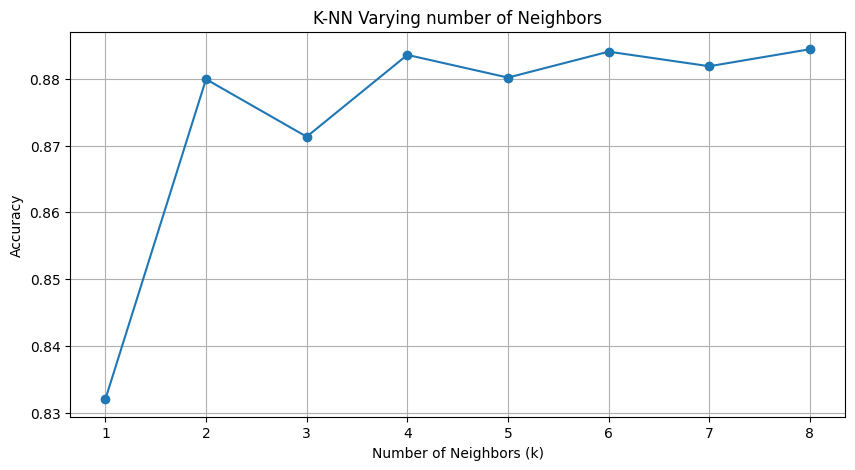

[0.8319980577810148,
 0.8799465889779072,
 0.871327992231124,
 0.8835882495751396,
 0.880189366351056,
 0.8840738043214372,
 0.8818888079630979,
 0.8844379703811605]

In [22]:

from sklearn.metrics import accuracy_score

# Prepare a range of k values to test
k_values = range(1,9)
accuracies = []

# Loop over various values of `k` for KNeighborsClassifier
for k in k_values:
    knn_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy vs k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-NN Varying number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

accuracies


<Figure size 640x480 with 0 Axes>

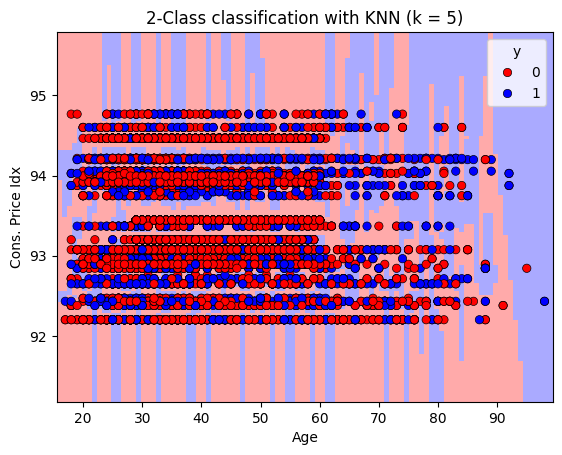

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

# Selecting only two features 'age' and 'cons.price.idx' and the target 'y'
X = data[['age', 'cons.price.idx']]
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # binary encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier and fit the data
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

# Plotting the decision boundary
plt.figure()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel='Age',
    ylabel='Cons. Price Idx',
    shading="auto"
)

# Plot also the training points
sns.scatterplot(
    x=X_train.iloc[:, 0],  # age
    y=X_train.iloc[:, 1],  # cons.price.idx
    hue=y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black"
)
plt.title(f"2-Class classification with KNN (k = {n_neighbors})")
plt.show()
